In [1]:
from scipy.special import expn

def J_over_JUV_inside_slab(tau, tau_SF):
    """
    Assume that uniform source distribtuion in a layer of 
    optical depth tau_SF (from -Lz/2 < z < Lz/2)

    Returns the mean intensity at tau(z) (optical depth from the midplane)
    0 < zz := tau(z)/(tau_SF/2) < 1.0
    """
    if not np.all(np.abs(tau) <= 0.5*tau_SF):
        raise ValueError("tau must be smaller than or equal to tau_SF/2")
            
    return 0.5/tau_SF*(2.0 - expn(2,0.5*tau_SF - tau) - expn(2,0.5*tau_SF + tau))

def J_over_JUV_outside_slab(tau, tau_SF):
    """
    Returns the mean intensity at height |z| > Lz/2
    with tau(z) = tau > tau_SF/2
    """
    if not np.all(np.abs(tau) >= 0.5*tau_SF):
        raise ValueError("optical depth must be larger than or equal to tau_SF/2")
    
    return 0.5/tau_SF*(expn(2,tau - 0.5*tau_SF) - expn(2,tau + 0.5*tau_SF))

def J_over_JUV_avg_slab(tau_SF):
    """
    Returns the mean intensity averaged over the entrie volume of the slab
    from -Lz/2 < z < Lz/2
    or 
    from -tau_SF/2 < tau < tau_SF/2
    """
    
    return 1.0/tau_SF*(1.0 - (0.5 - expn(3,tau_SF))/tau_SF)

tau_SF = np.logspace(-2,1)
J_mid = J_over_JUV_inside_slab(0.0,tau_SF)
J_edge = J_over_JUV_inside_slab(0.5*tau_SF,tau_SF)
J_avg = J_over_JUV_avg_slab(tau_SF)

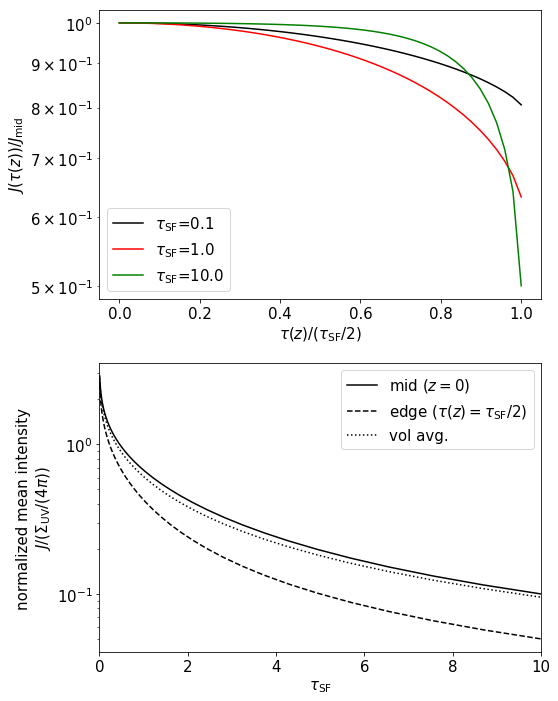

In [3]:
tau_SF = np.logspace(-2,1)
mpl.rcParams['font.size'] = 15
fig, axes = plt.subplots(2, 1, figsize=(8,10))

plt.sca(axes[0])
tau_SF2 = np.array([0.1,1.0,10.0])
colors = ['k','r','g']

for tau_SF_,color in zip(tau_SF2,colors):
    tau = np.linspace(0,0.5*tau_SF_)
    J_z = J_over_JUV_inside_slab(tau,tau_SF_)
    plt.plot(tau/(0.5*tau_SF_),J_z/max(J_z),c=color,label=r'$\tau_{{\rm SF}}$={0:.1f}'.format(tau_SF_))

plt.legend()
plt.yscale('log')
plt.xlabel(r'$\tau(z)/(\tau_{\rm SF}/2)$')
plt.ylabel(r'$J(\tau(z))/J_{\rm mid}$')

plt.sca(axes[1])
#plt.plot(tau_SF,yy_mid/yy_edge,'k-')
plt.plot(tau_SF,J_mid,'k-',label='mid ($z=0$)')
plt.plot(tau_SF,J_edge,'k--',label=r'edge ($\tau(z) = \tau_{{\rm SF}}/2$)')
plt.plot(tau_SF,J_avg,'k:',label='vol avg.')
plt.xlim(0,10)
plt.yscale('log')
plt.legend()
plt.xlabel(r'$\tau_{\rm SF}$')
plt.ylabel('normalized mean intensity\n' + r'$J/(\Sigma_{\rm UV}/(4\pi))$')

plt.tight_layout()

__Top: Mean intensity relative to the midplane value as a function of height__

// Bottom: Normalized intensity ($J/(\Sigma_{\rm UV}/(4\pi))$) as a function of $\tau_{\rm SF}$

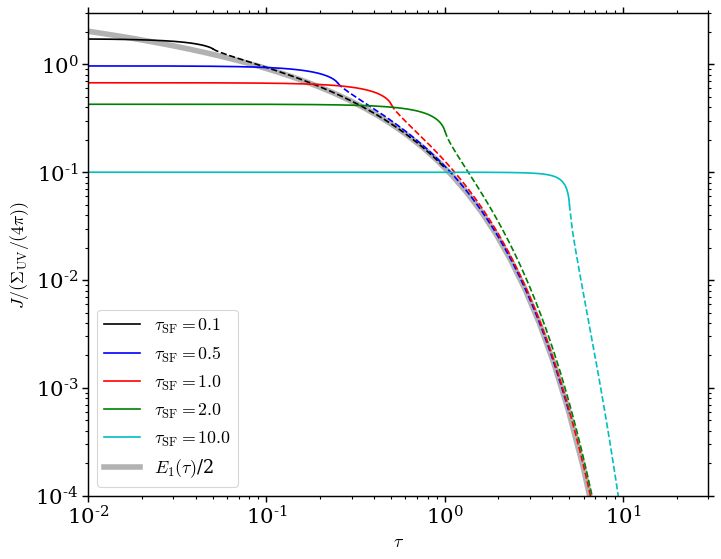

In [63]:
tau_SFs = [0.1,0.5,1.0,2.0,10.0]
colors = ['k','b','r','g','c']

for tau_SF,color in zip(tau_SFs[0:],colors[0:]):
    tau_in = np.linspace(0.0,0.5*tau_SF,num=500)
    tau_out = np.linspace(0.5*tau_SF,10.0*tau_SF,num=500)
    J_in = J_over_JUV_inside_slab(tau_in,tau_SF)
    J_out = J_over_JUV_outside_slab(tau_out,tau_SF)
#    plt.plot(tau_in/tau_SF,J_in,c=color,label=r'$\tau_{{\rm SF}}={0:4.1f}$'.format(tau_SF))
#    plt.plot(tau_out/tau_SF,J_out,c=color,ls='--')
    plt.plot(tau_in,J_in,c=color,label=r'$\tau_{{\rm SF}}={0:4.1f}$'.format(tau_SF))
    plt.plot(tau_out,J_out,c=color,ls='--')
    
    ## approximation at tau >> tau_SF/2
tt = np.logspace(-2,2)
plt.plot(tt,0.5*expn(1,tt),lw=5,alpha=0.6,c='gray',zorder=0,label=r'$E_1(\tau)$/2')
    #plt.plot(tau_in,0.5*expn(1,tau_in),c=color,ls=':')
    
plt.xscale('log')
plt.xlim(1e-2,30)
plt.yscale('log')
plt.ylim(bottom=1e-4,top=3.0)
plt.xlabel(r'$\tau$')
#plt.xlabel(r'$\tau/(\tau_{\rm SF}/2)$')
plt.ylabel(r'$J/(\Sigma_{\rm UV}/(4\pi))$')
plt.legend()